<a href="https://colab.research.google.com/github/kaioalexandre/Taxa-de-nascimento/blob/main/TaxaDeNascimento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dados disponíveis gratuitamente sobre nascimentos nos Estados Unidos, fornecidos pelos Centros de Controle de Doenças (CDC). Esses dados podem ser encontrados em: https://raw.githubusercontent.com/amankharwal/Birthrate-Analysis/master/births.csv

In [ ]:
import pandas as pd

In [ ]:
births = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Birthrate-Analysis/master/births.csv') 
print(births.head())
births['day'].fillna(0, inplace=True) 

   year  month  day gender  births
0  1969      1  1.0      F    4046
1  1969      1  1.0      M    4440
2  1969      1  2.0      F    4454
3  1969      1  2.0      M    4548
4  1969      1  3.0      F    4548


# Adicionando a coluna decade(década)

In [ ]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')
print(births.head())

   year  month  day gender  births  decade
0  1969      1  1.0      F    4046    1960
1  1969      1  1.0      M    4440    1960
2  1969      1  2.0      F    4454    1960
3  1969      1  2.0      M    4548    1960
4  1969      1  3.0      F    4548    1960


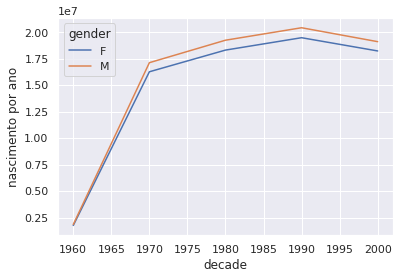

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set() 
birth_decade = births.pivot_table('births', index='decade', columns='gender', aggfunc='sum') 
birth_decade.plot() 
plt.ylabel("nascimento por ano") 
plt.show()

Podemos observar uma taxa de crescimento maior entre as décadas de 1960-1970, um crescimento menor entre 1970-1990 e então inicia uma diminuição do crescimento populacional, e sempre com um maior número de mulheres.

In [ ]:
import numpy as np
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

In [ ]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
births['day'] = births['day'].astype(int)
births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')

births['dayofweek'] = births.index.dayofweek

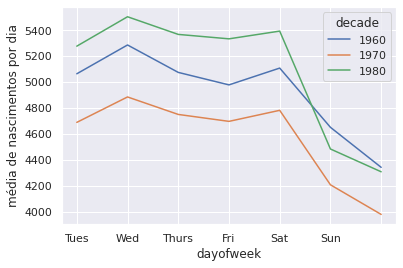

In [ ]:
births.pivot_table('births', index='dayofweek',
                    columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('média de nascimentos por dia');
plt.show()

In [ ]:
births_month = births.pivot_table('births', [births.index.month, births.index.day])
print(births_month.head())

births_month.index = [pd.datetime(2012, month, day)
                      for (month, day) in births_month.index]
print(births_month.head())

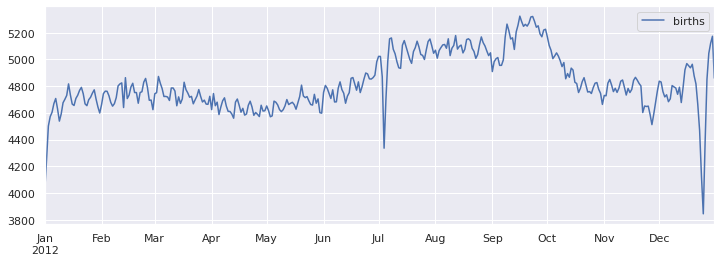

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
births_month.plot(ax=ax)
plt.show()

O maior número de nascimentos registrados ocorrem no mês de setembro